# 2025년도 빅데이터와 인공지능을 활용한 시스템 강건설계 데이터 챌린지!

#### - 데이터 챌린지 목표 
: 빅데이터 핸들링 능력, 데이터 특징 추출 및 선택, 차원축소 및 시각화 수행능력 평가
#### - 제공 데이터 구성 : 센서데이터(정상/고장1/고장2 각 10개) + 기록데이터(정상/고장1/고장2 각 1개)
#### - 총 4단계의 데이터 챌린지를 수행하며, 단계별 결과가 저장된 폴더(Result)와 최종 코드파일(.ipynb)을 1개 압축파일(.zip)로 제출
#### +++ csv 데이터 읽을 때 header=None 옵션 사용필수
#### +++ csv 데이터 저장할 때 header=None, index=None 옵션 사용필수
#### +++ 해당 파일의 Help Code 활용하지 않아도 결과만 맞으면 무관

### ! 과제 수행 전 확인사항 !   
이 코드 파일과 Data, SplittedData, Result 폴더의 경로는 AI_Code/DataChallenge 폴더 안에 위치시킬 것

.

.

.

## 라이브러리 import

In [102]:
import pandas as pd
import numpy  as np
import scipy.stats as sp
import pywt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 센서데이터, 기록데이터 보기

### - 센서데이터 :
* 정상, 고장1(Shunting Effect), 고장2(전극 비정렬) 각각 10개 센서데이터
* 전류 / 전압 / 가속도 3열로 구성(시간열 없음 주의!)
* Sampling Frequency: 12800Hz
* Sampling Time: 35초
* 데이터 1개당 12개의 용접 스폿이 포함됨

### - 기록데이터 :
* 정상, 고장1(Shunting Effect), 고장2(전극 비정렬) 각각 1개 기록데이터
* 기록데이터의 각 행: 용접 시작 시점의 인덱스 12개

### 데이터 살펴보기

In [103]:
SensorData = pd.read_csv('./Data/Normal/Data_1.csv', header = None, names = ['Current', 'Voltage', 'Acceleration']) # 센서 데이터
RecordData = pd.read_csv('./Data/Normal/RecordData.csv', header = None) # 기록 데이터

In [104]:
SensorData

,Current,Voltage,Acceleration
0,0.000256,-0.110187,-0.083613
1,0.000263,0.038778,-0.074989
2,0.000136,0.081950,-0.076114
3,0.000155,-0.009106,-0.087737
4,0.000207,-0.075121,-0.073115
...,...,...,...
447995,0.002858,0.012148,-0.086987
447996,0.002779,0.004938,-0.079113
447997,0.002906,0.010764,-0.045745
447998,0.002966,0.014146,-0.072740


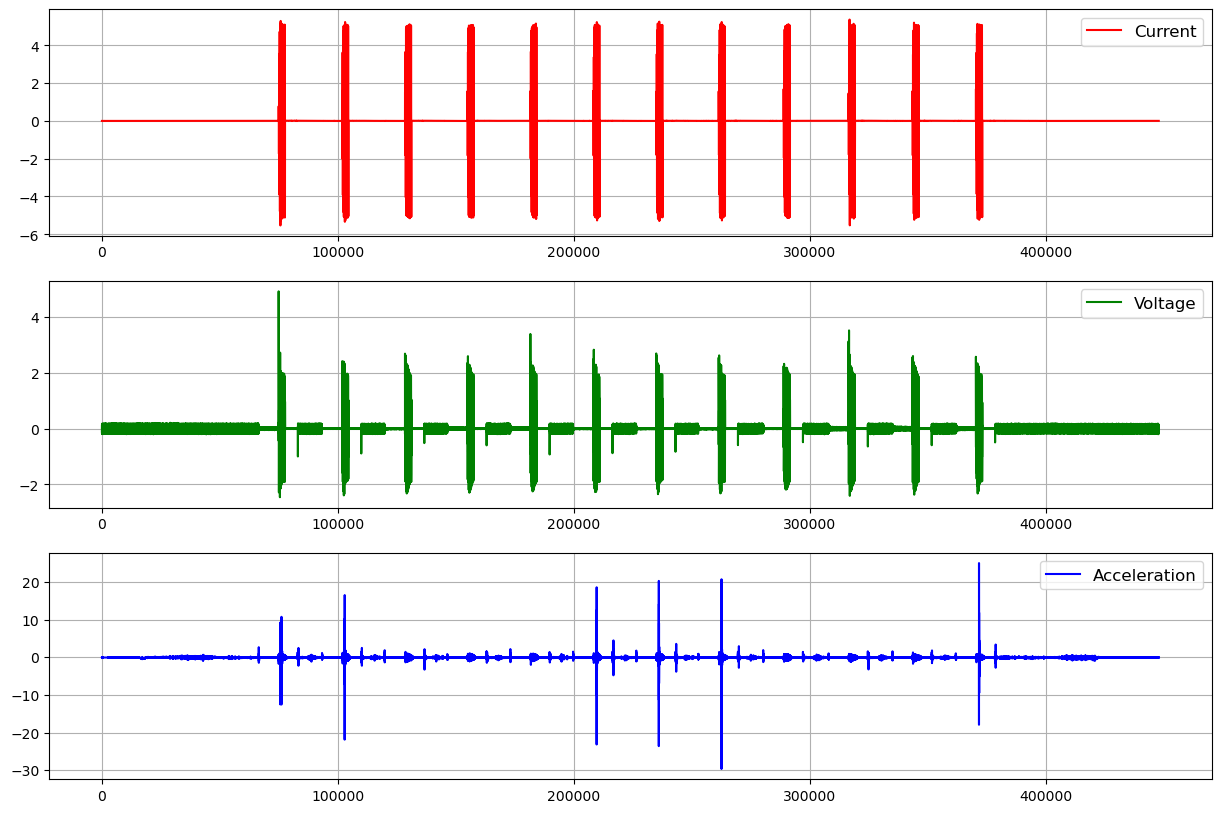

In [105]:
plt.figure(1, figsize=(15,10))
# 전류데이터 Plot
plt.subplot(3,1,1)
plt.plot(SensorData.iloc[:,0], c = 'r', label = SensorData.columns[0])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
# 전압데이터 Plot
plt.subplot(3,1,2)
plt.plot(SensorData.iloc[:,1], c = 'g', label = SensorData.columns[1])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
# 가속도데이터 Plot
plt.subplot(3,1,3)
plt.plot(SensorData.iloc[:,2], c = 'b', label = SensorData.columns[2])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
plt.show()

In [106]:
RecordData

,0,1,2,3,4,5,6,7,8,9,10,11
0,74904,101782,128458,154923,181601,208280,234958,261421,288950,316479,343583,370474
1,69471,96354,123032,149496,176174,202850,229527,255989,283517,311259,338573,365460
2,73402,100279,126740,153200,179873,206548,233223,259688,287220,314964,342067,368954
3,72413,99289,125744,152411,179075,205735,232393,258838,286351,313867,340954,368041
4,75502,102378,128835,155503,182171,208839,235721,262176,289484,317221,344318,371415
5,71015,97895,124359,151038,177929,204820,231496,257956,285270,313014,340119,367012
6,69157,96036,122496,148951,175617,202496,229165,255623,283149,310889,338199,365294
7,73063,99925,126584,153031,179693,206568,233228,259675,287191,314921,342013,369107
8,69916,96776,123221,149881,176542,203204,230079,256528,283831,311561,338651,365741
9,68888,95753,122201,148864,175528,202405,229068,255516,282818,310548,337639,364728


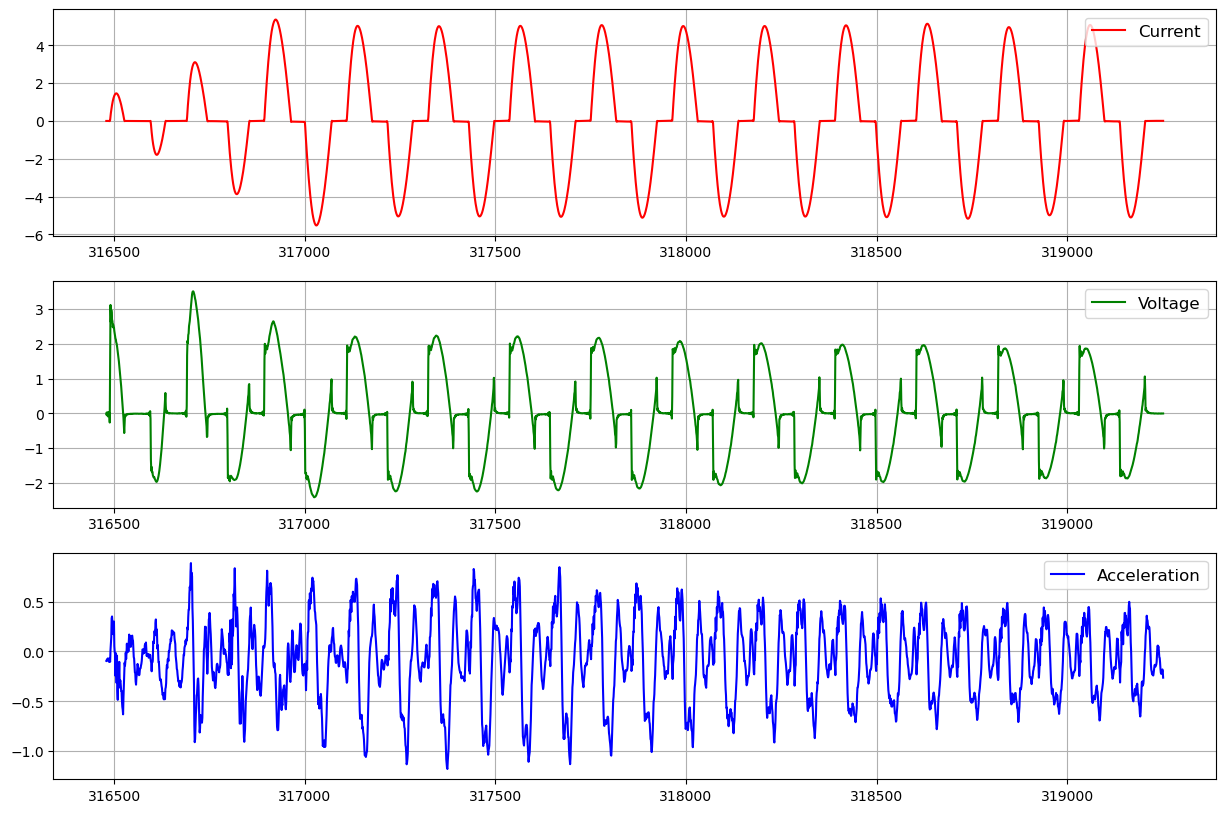

In [107]:
# 정상 스폿용접 센서 데이터 보기
DataNo = 1   # 1~10
SpotNo = 10  # 1~12

SensorData = pd.read_csv('./Data/Normal/Data_%d.csv'%DataNo, header = None, names = ['Current', 'Voltage', 'Acceleration']) # 센서 데이터

start_index = RecordData.iloc[DataNo - 1, SpotNo - 1]
SensorData_spot = SensorData.iloc[start_index:start_index+2774, :]

plt.figure(1, figsize=(15,10))
# 전류데이터 Plot
plt.subplot(3,1,1)
plt.plot(SensorData_spot.iloc[:,0], c = 'r', label = SensorData_spot.columns[0])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
# 전압데이터 Plot
plt.subplot(3,1,2)
plt.plot(SensorData_spot.iloc[:,1], c = 'g', label = SensorData_spot.columns[1])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
# 가속도데이터 Plot
plt.subplot(3,1,3)
plt.plot(SensorData_spot.iloc[:,2], c = 'b', label = SensorData_spot.columns[2])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
plt.show()

.

.

.

# [1단계] 센서데이터 분할
> #### 기록데이터 상 각각의 용접 시작 시점부터 2774행만큼(≒0.2167초간) 해당 센서데이터 Spot별로 분할, 저장
> #### 저장 경로 : 이 코드 파일이 위치한 경로의 ' SplittedData' 폴더 내부

## 필수!

#### SplittedData 폴더 내부 각 데이터 파일명:
* 정상(Normal) : Normal_1.csv, Normal_2.csv, Normal_3.csv, ..., Normal_120.csv
* 고장1(Fault Mode 1) : Abnormal1_1.csv, Abnormal1_2.csv, Abnormal1_3.csv, ..., Abnormal1_120.csv
* 고장2(Fault Mode 2) : Abnormal2_1.csv, Abnormal2_2.csv, Abnormal2_3.csv, ..., Abnormal2_120.csv

In [108]:
# Guide Code : 활용하지 않아도 결과만 맞으면 무관

NoOfData = 10
NoOfSpot = 12

RecordData_Normal    = pd.read_csv('./Data/Normal/RecordData.csv'   , header = None) # 정상  기록데이터 불러오기
RecordData_Abnormal1 = pd.read_csv('./Data/Abnormal1/RecordData.csv', header = None) # 고장1 기록데이터 불러오기
RecordData_Abnormal2 = pd.read_csv('./Data/Abnormal2/RecordData.csv', header = None) # 고장2 기록데이터 불러오기

for i in range(NoOfData):
    temp_path1 = './Data/Normal/Data_%d.csv'%(i+1)     # 정상  데이터 불러오기
    temp_path2 = './Data/Abnormal1/Data_%d.csv'%(i+1)  # 고장1 데이터 불러오기
    temp_path3 = './Data/Abnormal2/Data_%d.csv'%(i+1)  # 고장2 데이터 불러오기

    #데이터를 임시로 불러옵니다. 
    data1=pd.read_csv(temp_path1,sep=',')
    data2=pd.read_csv(temp_path2,sep=',')
    data3=pd.read_csv(temp_path3,sep=',')

    #데이터를 스폿 별로 분해합니다. 
    for j in range(NoOfSpot):
        N_spot=RecordData_Normal.iloc[i,j]
        A1_spot=RecordData_Abnormal1.iloc[i,j]
        A2_spot=RecordData_Abnormal2.iloc[i,j]
        temp_Normal=data1.iloc[N_spot-1:N_spot+2773,:]
        temp_Abnormal1=data1.iloc[A1_spot-1:A1_spot+2773,:]
        temp_Abnormal2=data1.iloc[A2_spot-1:A2_spot+2773,:]        
        
        temp_Normal.to_csv('./SplittedData/Normal_%d.csv'%(i*NoOfSpot+j+1), header=None, index=None)
        temp_Abnormal1.to_csv('./SplittedData/Abnormal1_%d.csv'%(i*NoOfSpot+j+1), header=None, index=None)
        temp_Abnormal2.to_csv('./SplittedData/Abnormal2_%d.csv'%(i*NoOfSpot+j+1), header=None, index=None)

### !!! (수강생 번호 외 코드 수정 X) 1단계 결과물을 제출용 파일로 저장

In [109]:
StudentNo =  332   # 수강생 번호 입력


Step1File1 = pd.read_csv('./SplittedData/Normal_120.csv', header=None)
Step1File2 = pd.read_csv('./SplittedData/Abnormal1_120.csv', header=None)
Step1File3 = pd.read_csv('./SplittedData/Abnormal2_120.csv', header=None)

Path1 = './Result/ST%d_DC1_1.csv'%StudentNo
Path2 = './Result/ST%d_DC1_2.csv'%StudentNo
Path3 = './Result/ST%d_DC1_3.csv'%StudentNo

Step1File1.to_csv(Path1, header=None, index=None)
Step1File2.to_csv(Path2, header=None, index=None)
Step1File3.to_csv(Path3, header=None, index=None)

.

.

.

# [2단계] Time, Frequency domain 특징 추출

> ### 1단계에서 분할한 데이터들을 대상으로 정상/고장1/고장2 데이터들을 모두 불러와서 특징 추출하기 

## 필수!
* 특징값 종류 및 순서(실습코드와 동일) : Max, Min, Mean, RMS, Variance, Skewness, Kurtosis, Crest factor, Shape factor, Impulse factor
* 웨이블릿 분해 : MotherWavelet = haar, Level = 8로 설정
* 데이터당 시간 영역 특징 30개, 주파수 영역(웨이블릿 분해) 특징 240개 추출 => 전체 특징데이터 Shape (270, 360)
* 추출한 특징데이터(DataFrame) 변수명: FeatureData

In [110]:
NoOfData    = 120  # 정상/고장1/고장2 스폿용접 데이터 각 120개씩 
NoOfSensor  = 3    # 전류(Current), 전압(Voltage), 가속도(Acceleration)
NoOfFeature = 10   # 특징 개수:10개 (순서: Max, Min, Mean, RMS, Variance, Skewness, Kurtosis, Crest factor, Shape factor, Impulse factor)

#### 특징 추출(Time domain)

In [111]:
def rms(x): # RMS 함수 정의
    return np.sqrt(np.mean(x**2))

In [112]:
# Time Domain 특징값 추출

# 특징데이터 크기 지정
TimeFeature_Normal = np.zeros((NoOfSensor*NoOfFeature , NoOfData))
TimeFeature_Abnormal1 = np.zeros((NoOfSensor*NoOfFeature , NoOfData))
TimeFeature_Abnormal2 = np.zeros((NoOfSensor*NoOfFeature , NoOfData))

for i in range(NoOfData):
    
    # 데이터 불러오기
    temp_path1 = './SplittedData/Normal_%d.csv'%(i+1)      # 정상 데이터 파일 경로
    temp_path2 = './SplittedData/Abnormal1_%d.csv'%(i+1)   # 고장1 데이터 파일 경로
    temp_path3 = './SplittedData/Abnormal2_%d.csv'%(i+1)   # 고장2 데이터 파일 경로

    N_data=pd.read_csv(temp_path1,sep=',')
    A1_data=pd.read_csv(temp_path2,sep=',')    
    A2_data=pd.read_csv(temp_path3,sep=',')    
    
    
    
    for j in range(NoOfSensor):
        # Normal Time Domain Feature
        TimeFeature_Normal[10*j+0, i] = np.max(N_data.iloc[:,j])
        TimeFeature_Normal[10*j+1, i] = np.min(N_data.iloc[:,j])
        TimeFeature_Normal[10*j+2, i] = np.mean(N_data.iloc[:,j])
        TimeFeature_Normal[10*j+3, i] = rms(N_data.iloc[:,j])
        TimeFeature_Normal[10*j+4, i] = np.var(N_data.iloc[:,j])
        TimeFeature_Normal[10*j+5, i] = sp.skew(N_data.iloc[:,j])
        TimeFeature_Normal[10*j+6, i] = sp.kurtosis(N_data.iloc[:,j])
        TimeFeature_Normal[10*j+7, i] = np.max(N_data.iloc[:,j])/rms(N_data.iloc[:,j])
        TimeFeature_Normal[10*j+8, i] = rms(N_data.iloc[:,j])/np.mean(np.abs(N_data.iloc[:,j]))
        TimeFeature_Normal[10*j+9, i] = np.max(N_data.iloc[:,j])/np.mean(np.abs(N_data.iloc[:,j]))
                

        # Abnormal1 Time Domain Feature
        TimeFeature_Abnormal1[10*j+0, i] = np.max(A1_data.iloc[:, j])
        TimeFeature_Abnormal1[10*j+1, i] = np.min(A1_data.iloc[:, j])
        TimeFeature_Abnormal1[10*j+2, i] = np.mean(A1_data.iloc[:, j])
        TimeFeature_Abnormal1[10*j+3, i] = rms(A1_data.iloc[:, j])
        TimeFeature_Abnormal1[10*j+4, i] = np.var(A1_data.iloc[:, j])
        TimeFeature_Abnormal1[10*j+5, i] = sp.skew(A1_data.iloc[:, j])
        TimeFeature_Abnormal1[10*j+6, i] = sp.kurtosis(A1_data.iloc[:, j])
        TimeFeature_Abnormal1[10*j+7, i] = np.max(A1_data.iloc[:, j]) / rms(A1_data.iloc[:, j])
        TimeFeature_Abnormal1[10*j+8, i] = rms(A1_data.iloc[:, j]) / np.mean(np.abs(A1_data.iloc[:, j]))
        TimeFeature_Abnormal1[10*j+9, i] = np.max(A1_data.iloc[:, j]) / np.mean(np.abs(A1_data.iloc[:, j]))


        

        # Abnormal2 Time Domain Feature
        TimeFeature_Abnormal2[10*j+0, i] = np.max(A2_data.iloc[:, j])
        TimeFeature_Abnormal2[10*j+1, i] = np.min(A2_data.iloc[:, j])
        TimeFeature_Abnormal2[10*j+2, i] = np.mean(A2_data.iloc[:, j])
        TimeFeature_Abnormal2[10*j+3, i] = rms(A2_data.iloc[:, j])
        TimeFeature_Abnormal2[10*j+4, i] = np.var(A2_data.iloc[:, j])
        TimeFeature_Abnormal2[10*j+5, i] = sp.skew(A2_data.iloc[:, j])
        TimeFeature_Abnormal2[10*j+6, i] = sp.kurtosis(A2_data.iloc[:, j])
        TimeFeature_Abnormal2[10*j+7, i] = np.max(A2_data.iloc[:, j]) / rms(A2_data.iloc[:, j])
        TimeFeature_Abnormal2[10*j+8, i] = rms(A2_data.iloc[:, j]) / np.mean(np.abs(A2_data.iloc[:, j]))
        TimeFeature_Abnormal2[10*j+9, i] = np.max(A2_data.iloc[:, j]) / np.mean(np.abs(A2_data.iloc[:, j]))



In [113]:
# 시간영역 특징 합치기(가로 방향)
TimeFeature = np.concatenate([TimeFeature_Normal, TimeFeature_Abnormal1,TimeFeature_Abnormal2] , axis=1)
TimeFeature.shape


(30, 360)

#### 특징 추출(Frequency domain)

In [114]:
#Frequency Domain 특징값 추출 (Wavelet Transform 기반)
# Wavelet options

MotherWavelet = pywt.Wavelet('haar')   # Mother wavelet (모함수) 지정
Level   = 8                            # Wavelet 분해 레벨 지정
select  = 8                            # 특징추출 영역 고주파 영역부터 개수 지정 (d1~)

#Frequency Domain 특징값 추출 (Wavelet Transform 기반)
FreqFeature_Normal    = np.zeros(shape=(NoOfSensor*NoOfFeature*select , NoOfData))
FreqFeature_Abnormal1 = np.zeros(shape=(NoOfSensor*NoOfFeature*select , NoOfData))
FreqFeature_Abnormal2 = np.zeros(shape=(NoOfSensor*NoOfFeature*select , NoOfData))

for i in range(NoOfData):
    
    # 데이터 불러오기
    temp_path1 = './SplittedData/Normal_%d.csv'%(i+1)      # 정상 데이터 파일 경로
    temp_path2 = './SplittedData/Abnormal1_%d.csv'%(i+1)   # 고장1 데이터 파일 경로
    temp_path3 = './SplittedData/Abnormal2_%d.csv'%(i+1)   # 고장2 데이터 파일 경로
    
    temp_data1 = np.array(pd.read_csv(temp_path1 , sep=',', header=None)) # 정상  데이터
    temp_data2 = np.array(pd.read_csv(temp_path2 , sep=',', header=None)) # 고장1 데이터
    temp_data3 = np.array(pd.read_csv(temp_path3 , sep=',', header=None)) # 고장2 데이터
    
    Coef1      = pywt.wavedec(temp_data1, MotherWavelet, level=Level, axis=0)
    Coef2      = pywt.wavedec(temp_data2, MotherWavelet, level=Level, axis=0)    
    Coef3      = pywt.wavedec(temp_data2, MotherWavelet, level=Level, axis=0)     
    
    
    
    for j in range(NoOfSensor):
        
        for k in np.arange(select):
            coef1 = Coef1[Level-k]
            coef2 = Coef2[Level-k]  
            coef3 = Coef3[Level-k] 
   
            # Normal Frequency Domain Feature
            FreqFeature_Normal[NoOfFeature*j*select + k*NoOfFeature + 0, i] = np.max(coef1[:, j])
            FreqFeature_Normal[NoOfFeature*j*select + k*NoOfFeature + 1, i] = np.min(coef1[:, j])
            FreqFeature_Normal[NoOfFeature*j*select + k*NoOfFeature + 2, i] = np.mean(coef1[:, j])
            FreqFeature_Normal[NoOfFeature*j*select + k*NoOfFeature + 3, i] = rms(coef1[:, j])
            FreqFeature_Normal[NoOfFeature*j*select + k*NoOfFeature + 4, i] = np.var(coef1[:, j])
            FreqFeature_Normal[NoOfFeature*j*select + k*NoOfFeature + 5, i] = sp.skew(coef1[:, j])
            FreqFeature_Normal[NoOfFeature*j*select + k*NoOfFeature + 6, i] = sp.kurtosis(coef1[:, j])
            FreqFeature_Normal[NoOfFeature*j*select + k*NoOfFeature + 7, i] = np.max(coef1[:, j]) / rms(coef1[:, j])
            FreqFeature_Normal[NoOfFeature*j*select + k*NoOfFeature + 8, i] = rms(coef1[:, j]) / np.mean(np.abs(coef1[:, j]))
            FreqFeature_Normal[NoOfFeature*j*select + k*NoOfFeature + 9, i] = np.max(coef1[:, j]) / np.mean(np.abs(coef1[:, j]))

            # Abnormal Frequency Domain Feature
            
            FreqFeature_Abnormal1[NoOfFeature*j*select + k*NoOfFeature + 0, i] = np.max(coef2[:, j])
            FreqFeature_Abnormal1[NoOfFeature*j*select + k*NoOfFeature + 1, i] = np.min(coef2[:, j])
            FreqFeature_Abnormal1[NoOfFeature*j*select + k*NoOfFeature + 2, i] = np.mean(coef2[:, j])
            FreqFeature_Abnormal1[NoOfFeature*j*select + k*NoOfFeature + 3, i] = rms(coef2[:, j])
            FreqFeature_Abnormal1[NoOfFeature*j*select + k*NoOfFeature + 4, i] = np.var(coef2[:, j])
            FreqFeature_Abnormal1[NoOfFeature*j*select + k*NoOfFeature + 5, i] = sp.skew(coef2[:, j])
            FreqFeature_Abnormal1[NoOfFeature*j*select + k*NoOfFeature + 6, i] = sp.kurtosis(coef2[:, j])
            FreqFeature_Abnormal1[NoOfFeature*j*select + k*NoOfFeature + 7, i] = np.max(coef2[:, j]) / rms(coef2[:, j])
            FreqFeature_Abnormal1[NoOfFeature*j*select + k*NoOfFeature + 8, i] = rms(coef2[:, j]) / np.mean(np.abs(coef2[:, j]))
            FreqFeature_Abnormal1[NoOfFeature*j*select + k*NoOfFeature + 9, i] = np.max(coef2[:, j]) / np.mean(np.abs(coef2[:, j]))

           # Abnormal2 Frequency Domain Feature
            FreqFeature_Abnormal2[NoOfFeature*j*select + k*NoOfFeature + 0, i] = np.max(coef2[:, j])
            FreqFeature_Abnormal2[NoOfFeature*j*select + k*NoOfFeature + 1, i] = np.min(coef2[:, j])
            FreqFeature_Abnormal2[NoOfFeature*j*select + k*NoOfFeature + 2, i] = np.mean(coef2[:, j])
            FreqFeature_Abnormal2[NoOfFeature*j*select + k*NoOfFeature + 3, i] = rms(coef2[:, j])
            FreqFeature_Abnormal2[NoOfFeature*j*select + k*NoOfFeature + 4, i] = np.var(coef2[:, j])
            FreqFeature_Abnormal2[NoOfFeature*j*select + k*NoOfFeature + 5, i] = sp.skew(coef2[:, j])
            FreqFeature_Abnormal2[NoOfFeature*j*select + k*NoOfFeature + 6, i] = sp.kurtosis(coef2[:, j])
            FreqFeature_Abnormal2[NoOfFeature*j*select + k*NoOfFeature + 7, i] = np.max(coef2[:, j]) / rms(coef2[:, j])
            FreqFeature_Abnormal2[NoOfFeature*j*select + k*NoOfFeature + 8, i] = rms(coef2[:, j]) / np.mean(np.abs(coef2[:, j]))
            FreqFeature_Abnormal2[NoOfFeature*j*select + k*NoOfFeature + 9, i] = np.max(coef2[:, j]) / np.mean(np.abs(coef2[:, j]))
                        
    
            

In [115]:
# 주파수영역 특징 합치기(가로 방향)
FreqFeature = np.concatenate([FreqFeature_Normal, FreqFeature_Abnormal1,FreqFeature_Abnormal2] , axis=1)
FreqFeature.shape


(240, 360)

In [116]:
# 시간/주파수영역 특징 합치기(세로 방향)

FeatureData = np.concatenate([TimeFeature,FreqFeature] , axis=0)
FeatureData = pd.DataFrame(FeatureData)
FeatureData.shape


(270, 360)

### 2단계 결과물 제출용 파일로 저장(수강생 번호 외 코드 수정 X)

In [117]:
StudentNo = 332   # 수강생 번호 입력

Path1 = './Result/ST%d_DC2.csv'%StudentNo
FeatureData.to_csv(Path1, header=None, index=None)

.

.

.

# [3단계] 특징 데이터 ANOVA 수행
> ### 특징 데이터 분리하여 정상/고장1/고장2 각각 ANOVA 기반 구분성 상위 10개 특징 선택
> ### ANOVA: scipy.stats 라이브러리의 f_oneway 함수 사용
> ##### (참고:https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

## 필수!
* 정상/고장1/고장2  P value 기반 구분성 상위 10개 선택된 특징(DataFrame) 변수명 : FeatureSelected

#### 특징데이터 분리: 정상, 고장1, 고장2

In [131]:
NoOfData = int(FeatureData.shape[1]/3)
Normal_FeatureData    = FeatureData.iloc[:,:NoOfData]
Abnormal_FeatureData1 = FeatureData.iloc[:,NoOfData:NoOfData*2]
Abnormal_FeatureData2 = FeatureData.iloc[:,NoOfData*2:]

print(Normal_FeatureData.shape)
print(Abnormal_FeatureData1.shape)
print(Abnormal_FeatureData2.shape)

(270, 120)
(270, 120)
(270, 120)


#### 정상/고장1/고장2 특징 별 ANOVA 수행하여 P value 계산

In [139]:
NoOfFeature = FeatureData.shape[0] # 추출된 Feature 갯수

P_value = np.zeros((NoOfFeature , 2))

p_N  = np.zeros((NoOfFeature , 2))           
p_A1 = np.zeros((NoOfFeature , 2))             
p_A2 = np.zeros((NoOfFeature , 2))               

for i in range(NoOfFeature):
    n  = Normal_FeatureData .iloc[i, :].values
    a1 = Abnormal_FeatureData1.iloc[i, :].values
    a2 = Abnormal_FeatureData2.iloc[i, :].values

    # Normal ANOVA
    p_N [i,0] = i
    p_N [i,1] = sp.f_oneway(n,  np.concatenate([a1, a2])).pvalue
    # Abn1  ANOVA
    p_A1 [i,0] = i
    p_A1 [i] = sp.f_oneway(a1, np.concatenate([n , a2])).pvalue
    # Abn2  ANOVA
    p_A2 [i,0] = i
    p_A2 [i] = sp.f_oneway(a2, np.concatenate([n , a1])).pvalue


#### P value 기준 정렬

In [140]:
#Normal Data의 상위 특징 p-value 정렬
p_N=pd.DataFrame(p_N)
Rank_N = p_N.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬

Rank_N

,0,1
4,4.0,2.356117e-103
14,14.0,8.010725e-95
3,3.0,2.545444e-88
92,92.0,2.103363e-86
13,13.0,1.221771e-83
...,...,...
72,72.0,9.158567e-01
245,245.0,9.430582e-01
263,263.0,9.815781e-01
212,212.0,9.840183e-01


In [141]:
#Abormal1 Data의 상위 특징 p-value 정렬
p_A1=pd.DataFrame(p_A1)
Rank_A1 = p_A1.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬

Rank_A1

,0,1
2,1.525181e-17,1.525181e-17
92,8.667224e-16,8.667224e-16
84,5.715095e-15,5.715095e-15
64,8.367232e-15,8.367232e-15
104,9.358124e-15,9.358124e-15
...,...,...
245,9.715110e-01,9.715110e-01
22,9.831040e-01,9.831040e-01
263,9.907884e-01,9.907884e-01
212,9.920088e-01,9.920088e-01


In [142]:
#Abormal2 Data의 상위 특징 p-value 정렬
p_A2=pd.DataFrame(p_A2)
Rank_A2 = p_A2.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬

Rank_A2

,0,1
4,2.276606e-29,2.276606e-29
14,2.409193e-29,2.409193e-29
3,6.129733e-29,6.129733e-29
13,7.281590e-29,7.281590e-29
1,1.201720e-26,1.201720e-26
...,...,...
72,9.578699e-01,9.578699e-01
245,9.715110e-01,9.715110e-01
263,9.907884e-01,9.907884e-01
212,9.920088e-01,9.920088e-01


#### P value 기반 구분성 상위 10개 특징 선택

In [143]:
# StartRank 부터 Number 만큼의 Feature
StartRank = 0                      
Number    = 10

Normal     = np.zeros((Number, NoOfData*3))
Abnormal1  = np.zeros((Number, NoOfData*3))
Abnormal2  = np.zeros((Number, NoOfData*3))

for i in range(StartRank,Number):
    
    index1          = int(Rank_N.iloc[i,0])  #Normal의 상위 10개 특성 삽입
    Normal  [i, :] = FeatureData.iloc  [index1, :].values
    
    index2          = int(Rank_A1.iloc[i,0])
    Abnormal1[i, :] = FeatureData.iloc  [index2, :].values

    index3          = int(Rank_A2.iloc[i,0])
    Abnormal2[i, :] = FeatureData.iloc  [index3, :].values

FeatureSelected=pd.DataFrame(np.concatenate([Normal,Abnormal1,Abnormal2],axis=0))


### 3단계 결과물 제출용 파일로 저장(수강생 번호 외 코드 수정 X)

In [144]:
StudentNo = 332   # 수강생 번호 입력

Path1 = './Result/ST%d_DC3.csv'%StudentNo

FeatureSelected.to_csv(Path1, header=None, index=None)

.

.

.

# [4단계] 선택된 특징 각각 차원축소(PCA) 및 2D Plot 시각화

## 필수!
* PCA 적용 전 특징 데이터 표준화 (StandardScaler 활용)
* Plot 설정 아래와 같이 수행
               figsize = (10, 10)   
               점 색깔: 정상=파랑('b'), 고장1=빨강('r'), 고장2=자홍('m')   
               Label: 정상='Normal', 고장1='Abnormal1', 고장2='Abnormal2'
               공통 옵션: linestyle='', marker='o'
               가로/세로 축 이름 각각 PC1/PC2

* 출력된 그래프를 'ST(수강생번호)_DC4.png'이름으로 Result 폴더 내 저장

In [145]:
FeatureSelected = pd.read_csv('./Result/ST332_DC3.csv', sep=',', header=None)

In [146]:
# 선택된 특징데이터에 대한 표준화
FeatureSelected = FeatureSelected.T  
FeatureSelected_normed = StandardScaler().fit_transform(FeatureSelected)
FeatureSelected_normed.shape

(360, 30)

#### 선정된 특징 PCA 통한 차원축소

In [147]:
# 10개 PC(Principal Component) 추출
pca = PCA(n_components = 2)
PC  = pca.fit_transform(FeatureSelected_normed)

In [148]:
PC.shape


(360, 2)

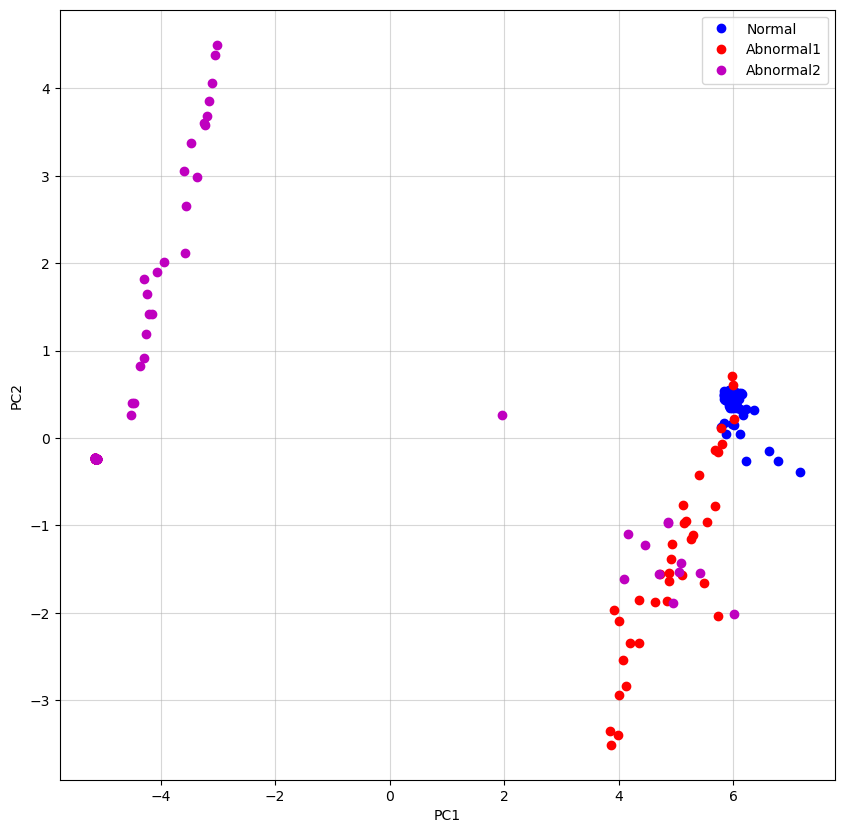

In [149]:
# PC1, PC2 2가지 주성분의 산점도 그리기
NoOfData = int(PC.shape[0]/3)

plt.figure(1, (10,10))
plt.plot(PC[:NoOfData,0], PC[:NoOfData,1], color='b',linestyle='', marker='o', label='Normal')
plt.plot(PC[NoOfData:NoOfData*2,0], PC[NoOfData:NoOfData*2,1], color='r', linestyle='', marker='o', label='Abnormal1')
plt.plot(PC[NoOfData*2:,0], PC[NoOfData*2:,1], color='m', linestyle='', marker='o', label='Abnormal2')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.5)
plt.show()




.

.

.

# ● 결과가 저장된 폴더(Result)와 작성 완료된 본 코드 파일을 하나의 zip파일로 제출
> ## 압축파일 이름 ST(수강생번호)_DC (예시: 'ST00_DC', 'ST0_DC')
압축파일 더블클릭시 Result 폴더, DataChallenge_ST-(수강생번호) 나타나도록 파일 구성